## 14.3 신생아 이름

In [2]:
import pandas as pd

In [3]:
names1880 = pd.read_csv('C:/github\pydata-book-2nd-edition/datasets/babynames/yob1880.txt',
                       names=['names', 'sex', 'births'])
names1880

,names,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [4]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [7]:
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'C:/github\pydata-book-2nd-edition/datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)
    
    frame['year'] = year
    pieces.append(frame)
    
# 모두 하나의 DataFrame으로 합치기
names = pd.concat(pieces, ignore_index=True)

In [8]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [9]:
total_births = names.pivot_table('births', index='year',
                                columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


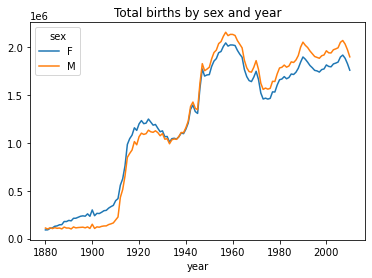

In [10]:
total_births.plot(title='Total births by sex and year')

In [12]:
# 각 이름이 전체 출생수에서 차지하는 비율
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [13]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [14]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [16]:
# 연도별/성별에 따른 선호하는 이름 1000개
pieces= []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index = True)

In [17]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


### 이름 유행 분석

In [18]:
boys = top1000[top1000.sex == 'M']

In [19]:
girls = top1000[top1000.sex == 'F']

In [20]:
total_births = top1000.pivot_table('births', index='year',
                                  columns = 'name',
                                  aggfunc = sum)

In [21]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [22]:
# 몇몇의 이름 추이
subset = total_births[['John','Harry','Mary','Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000195EAD0E820>,
      dtype=object)

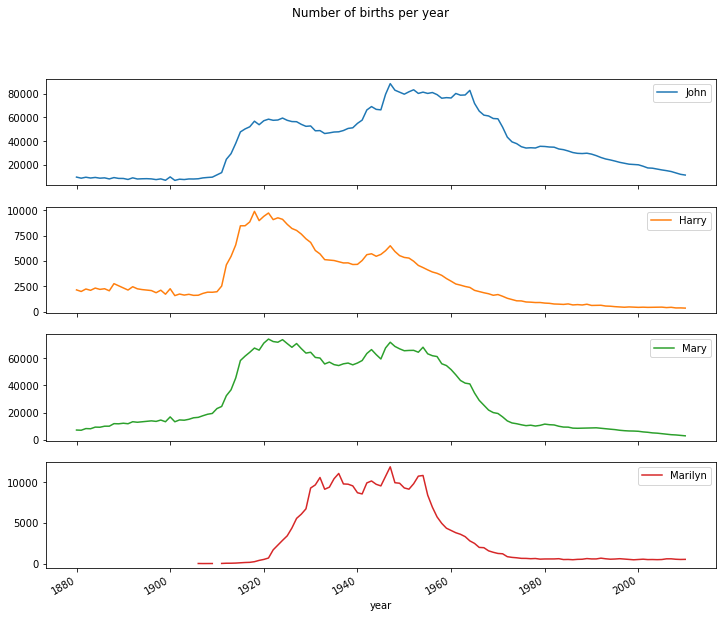

In [26]:
subset.plot(subplots=True, figsize=(12,10), grid=False,
           title="Number of births per year")

#### 다양한 이름을 사용하는 경향 측정하기

* 부모가 아이의 이름을 지을 때 흔한 이름은 기피하는 경향

In [27]:
table = top1000.pivot_table('prop', index= 'year',
                           columns='sex', aggfunc = sum)

In [29]:
import numpy as np

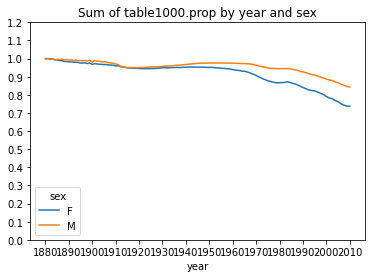

In [30]:
table.plot(title = 'Sum of table1000.prop by year and sex',
          yticks = np.linspace(0,1.2,13), xticks=range(1880, 2020, 10))

* 감소 추세

In [32]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [33]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [34]:
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [35]:
prop_cumsum.values.searchsorted(0.5)

116

* 배열의 색인은 0부터 시작하기 때문에 결과에 1을 더해서 117

In [36]:
df = boys[boys.year ==1900]

In [39]:
in1900 = df.sort_values(by='prop',ascending=False).prop.cumsum()

In [40]:
in1900.values.searchsorted(0.5) +1

25

In [41]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q)+1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [42]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


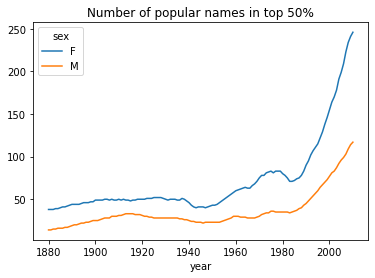

In [43]:
diversity.plot(title = "Number of popular names in top 50%")

* 여자 이름이 남자 이름보다 다양하며, 시간이 흐를수록 더 다양해지고 있다.

#### '마지막 글자'의 변화

In [45]:
# name컬럼에서 마지막 글자 추출
get_last_letter = lambda x : x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters,
                         columns = ['sex','year'], aggfunc=sum)

In [47]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [48]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [50]:
letter_prop = subtable/subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

In [51]:
import matplotlib.pyplot as plt

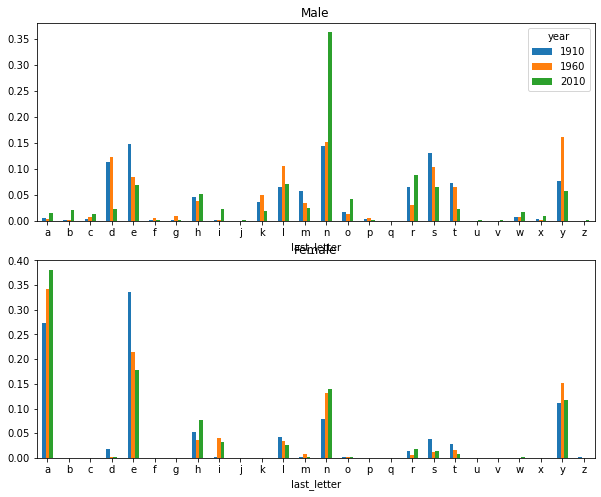

In [61]:
fig, axes = plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                     legend=False)

In [62]:
letter_prop = table/table.sum()

In [63]:
dny_ts = letter_prop.loc[['d','n','y'], 'M'].T
dny_ts.head

<bound method NDFrame.head of last_letter         d         n         y
year                                     
1880         0.083055  0.153213  0.075760
1881         0.083247  0.153214  0.077451
1882         0.085340  0.149560  0.077537
1883         0.084066  0.151646  0.079144
1884         0.086120  0.149915  0.080405
...               ...       ...       ...
2006         0.025075  0.351666  0.060338
2007         0.024451  0.358274  0.059634
2008         0.023574  0.361101  0.060342
2009         0.023398  0.362523  0.057223
2010         0.023387  0.362771  0.058168

[131 rows x 3 columns]>

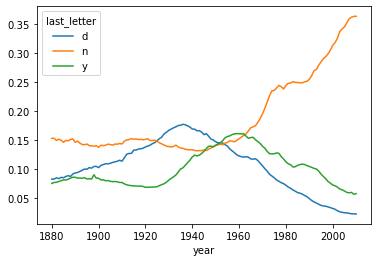

In [65]:
dny_ts.plot()

#### 남자 이름과 여자 이름이 바뀐 경우

In [68]:
all_names = pd.Series(top1000.name.unique())

In [69]:
# 'lesl'로 시작하는 이름
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [70]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [71]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [73]:
table = filtered.pivot_table('births', index='year',
                            columns='sex', aggfunc='sum')

In [75]:
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


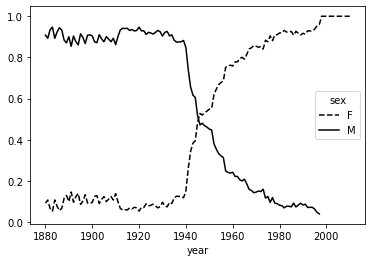

In [76]:
table.plot(style={'M':'k-','F': 'k--'})